### prompt emgineering for vision models
#### some example code are from deeplearning.ai short courses
#### https://www.deeplearning.ai/short-courses/prompt-engineering-for-vision-models/

#### zero-shot face detection

In [77]:
# Load images
from PIL import Image
raw_img = Image.open("/home/shanshan/Downloads/ai_gongjun/IMG_9737.JPG")
# raw_img = Image.open("/home/shanshan/Downloads/ai_gongjun/eileencollins.jpg")


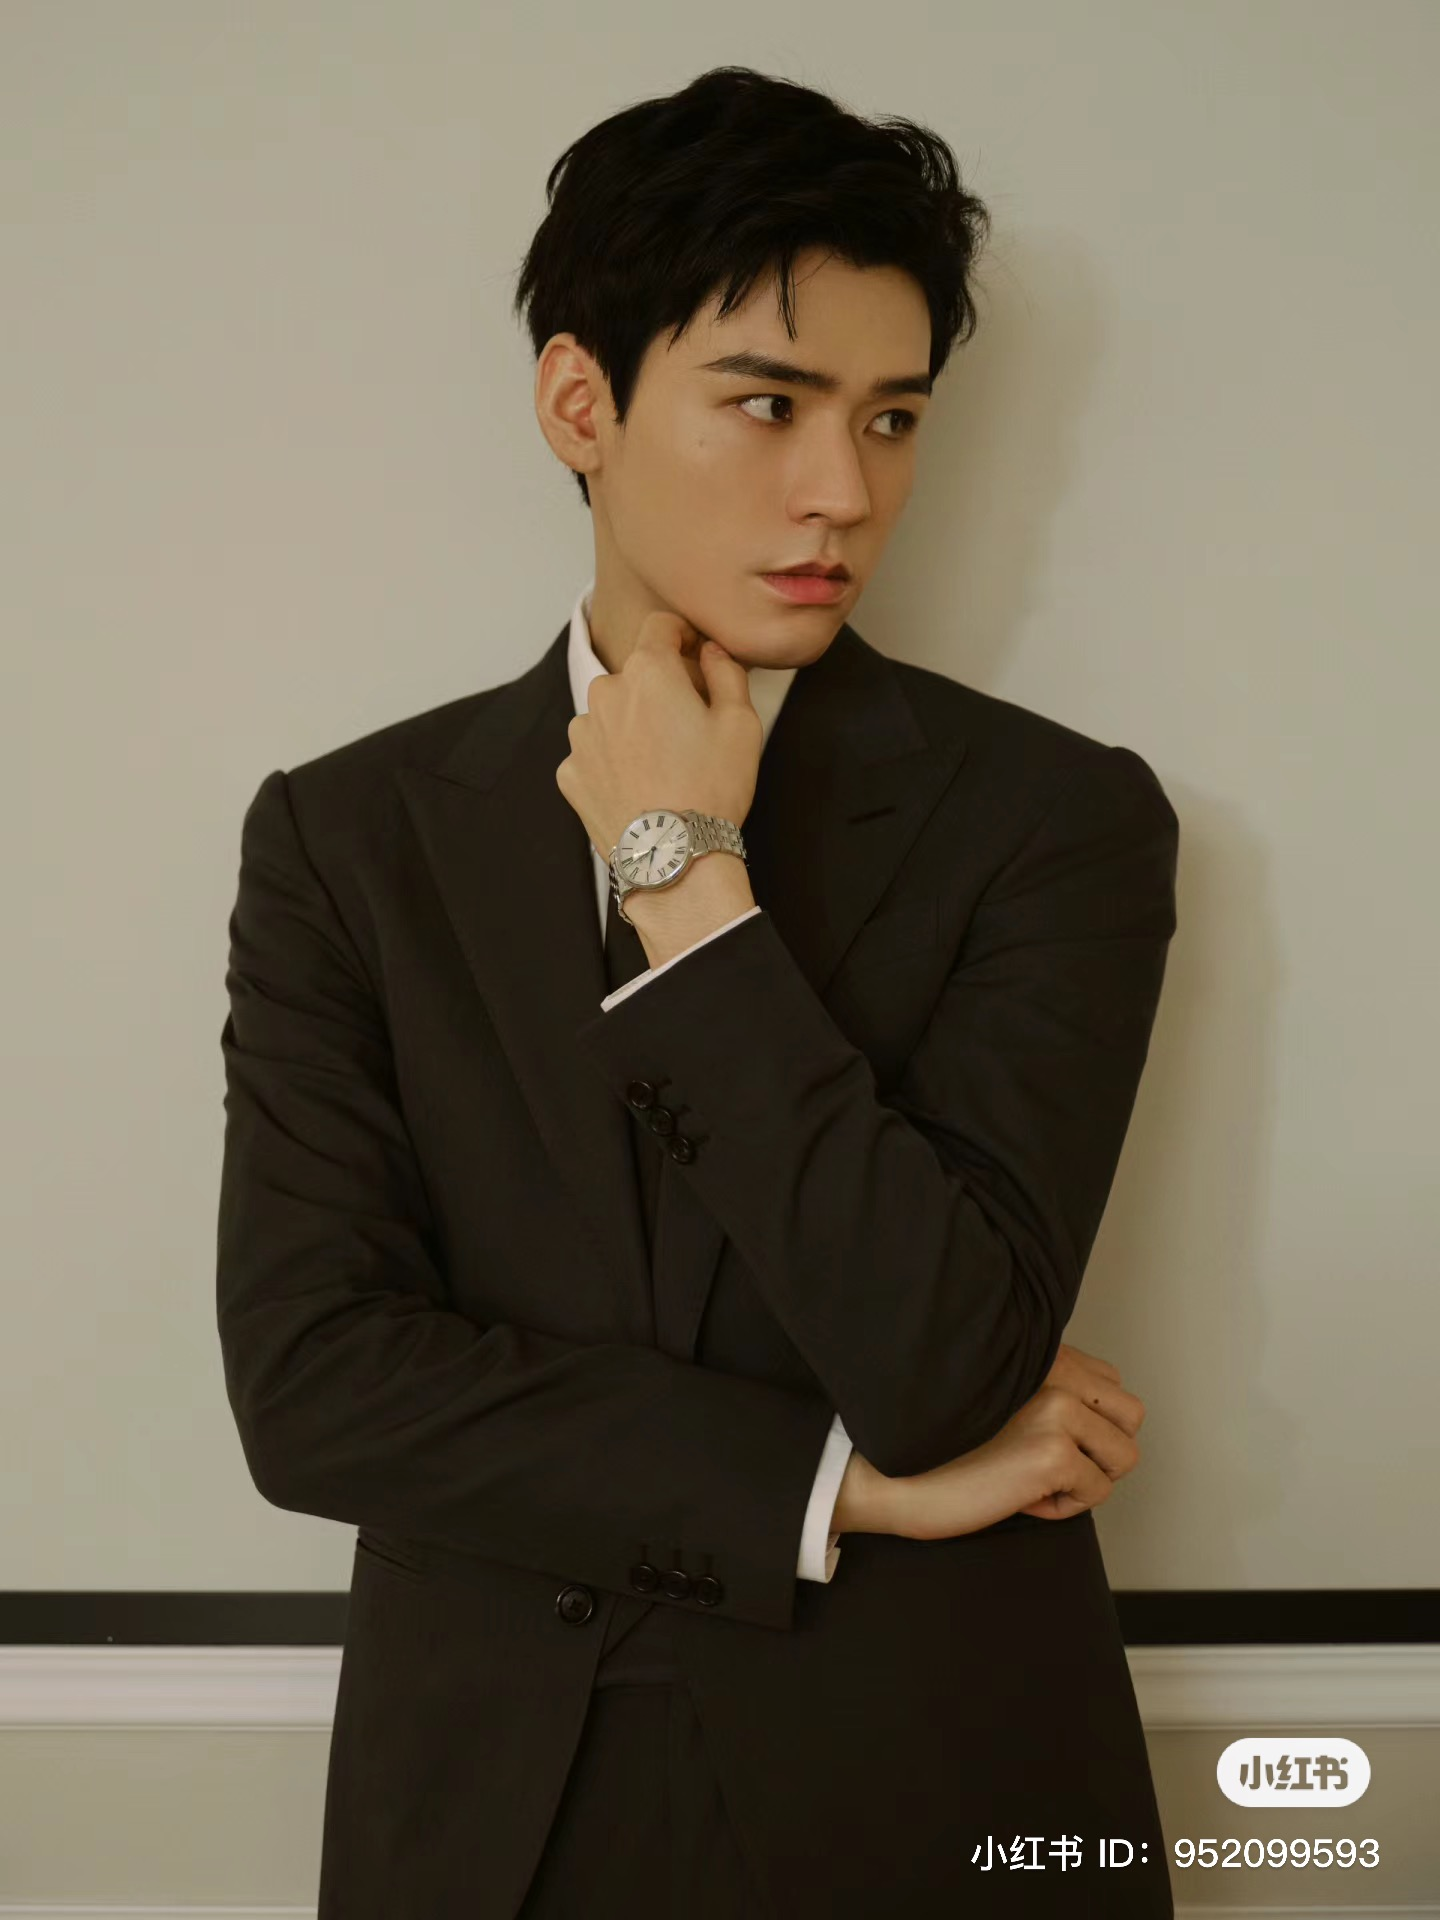

In [78]:
raw_img

In [79]:
raw_img.size

(1440, 1920)

In [98]:
from utils import resize_image
resize_image = resize_image(raw_img, input_size=1024)

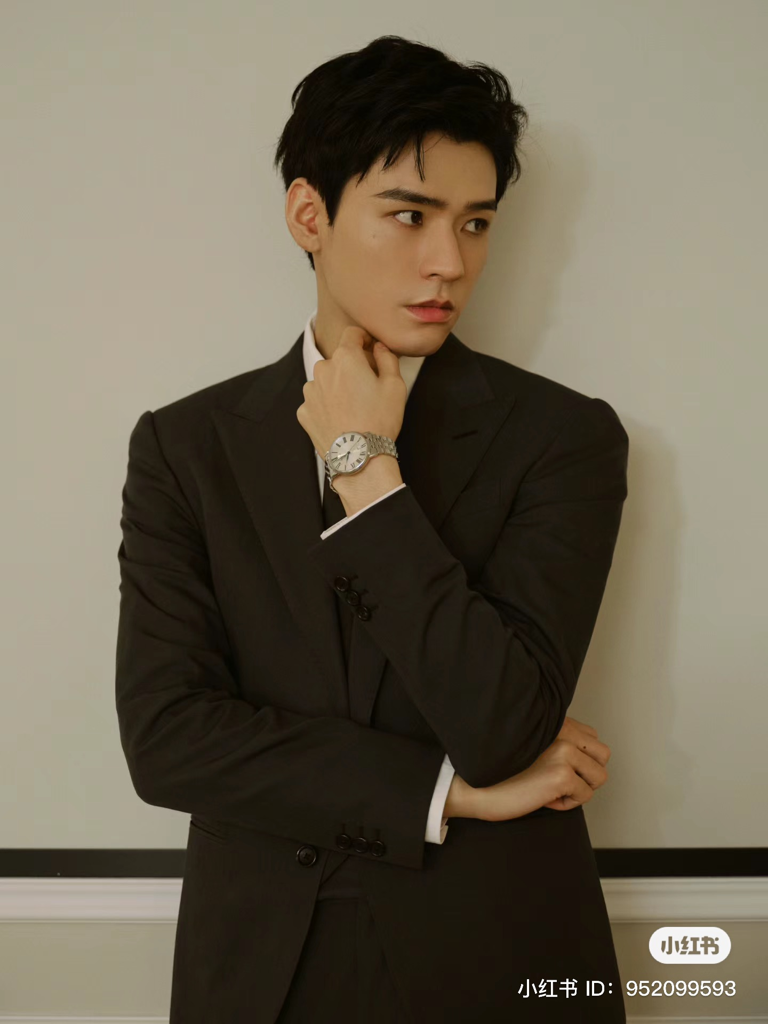

In [103]:
resize_image

In [8]:
from transformers import pipeline
import torch

/home/shanshan/miniconda3/envs/tinyllava_factory/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [63]:
# checkpoint = "google/owlv2-base-patch16-ensemble"
checkpoint = "google/owlvit-large-patch14"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

/home/shanshan/miniconda3/envs/tinyllava_factory/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/shanshan/miniconda3/envs/tinyllava_factory/lib/python3.10/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_pr

In [114]:
text_prompt = "a human face"
predictions = detector(
    resize_image,
    # raw_img,
    candidate_labels=[text_prompt]
)

In [115]:
predictions

[{'score': 0.10698288679122925,
  'label': 'a human face',
  'box': {'xmin': 331, 'ymin': 125, 'xmax': 498, 'ymax': 356}}]

In [84]:
from utils import preprocess_outputs

In [116]:
input_scores, input_labels, input_boxes = preprocess_outputs(predictions)

In [107]:
from utils import show_boxes_and_labels_on_image

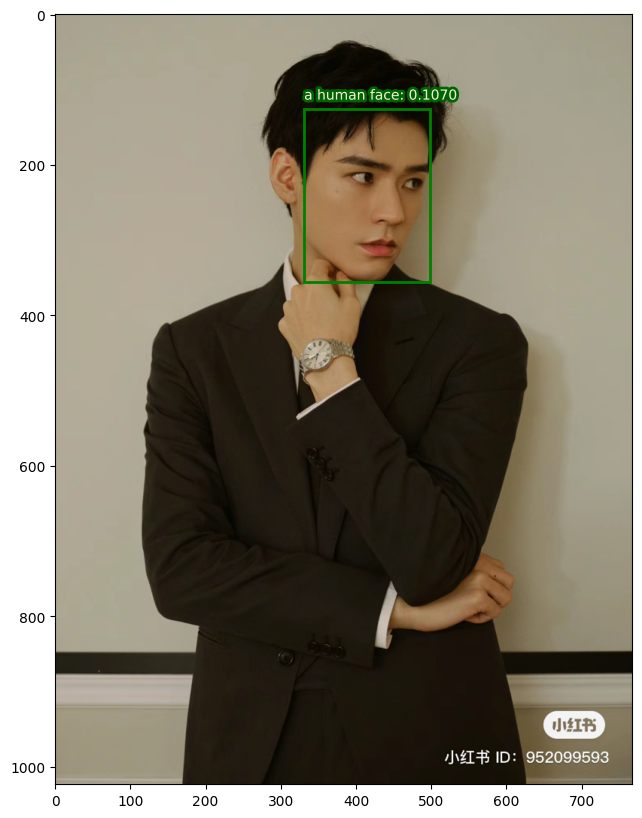

In [117]:
show_boxes_and_labels_on_image(
    resize_image,
    # raw_img,
    input_boxes[0],
    input_labels,
    input_scores
)

#### Get segementation masks

In [118]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 935.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.0/793.0 kB 7.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 31.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 27.6 MB/s eta 0:00:00


In [119]:
from ultralytics import SAM

In [120]:
sam_model = SAM("mobile_sam.pt")

100%|██████████| 38.8M/38.8M [00:00<00:00, 63.0MB/s]


In [121]:
import numpy as np
from utils import show_masks_on_image

In [122]:
labels = np.repeat(1, len(predictions))
labels

array([1])

In [123]:
result = sam_model.predict(
    resize_image,
    bboxes = input_boxes[0],
    labels = labels,
)


0: 1024x1024 579.4ms
Speed: 6.0ms preprocess, 579.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


In [124]:
result

[ultralytics.engine.results.Results object with attributes:
 
 boxes: None
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: '0'}
 obb: None
 orig_img: array([[[142, 161, 169],
         [142, 161, 169],
         [142, 161, 169],
         ...,
         [134, 155, 157],
         [134, 155, 157],
         [134, 155, 157]],
 
        [[142, 161, 169],
         [142, 161, 169],
         [142, 161, 169],
         ...,
         [134, 155, 157],
         [134, 155, 157],
         [134, 155, 157]],
 
        [[142, 161, 169],
         [142, 161, 169],
         [142, 161, 169],
         ...,
         [134, 155, 157],
         [134, 155, 157],
         [134, 155, 157]],
 
        ...,
 
        [[136, 155, 162],
         [136, 155, 162],
         [137, 156, 163],
         ...,
         [ 93, 112, 119],
         [ 93, 112, 119],
         [ 94, 113, 120]],
 
        [[142, 160, 167],
         [143, 161, 168],
         [143, 161, 168],
         ...,
         [ 99, 118, 125

In [125]:
mask = result[0].masks.data
mask

tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]]], device='cuda:0')

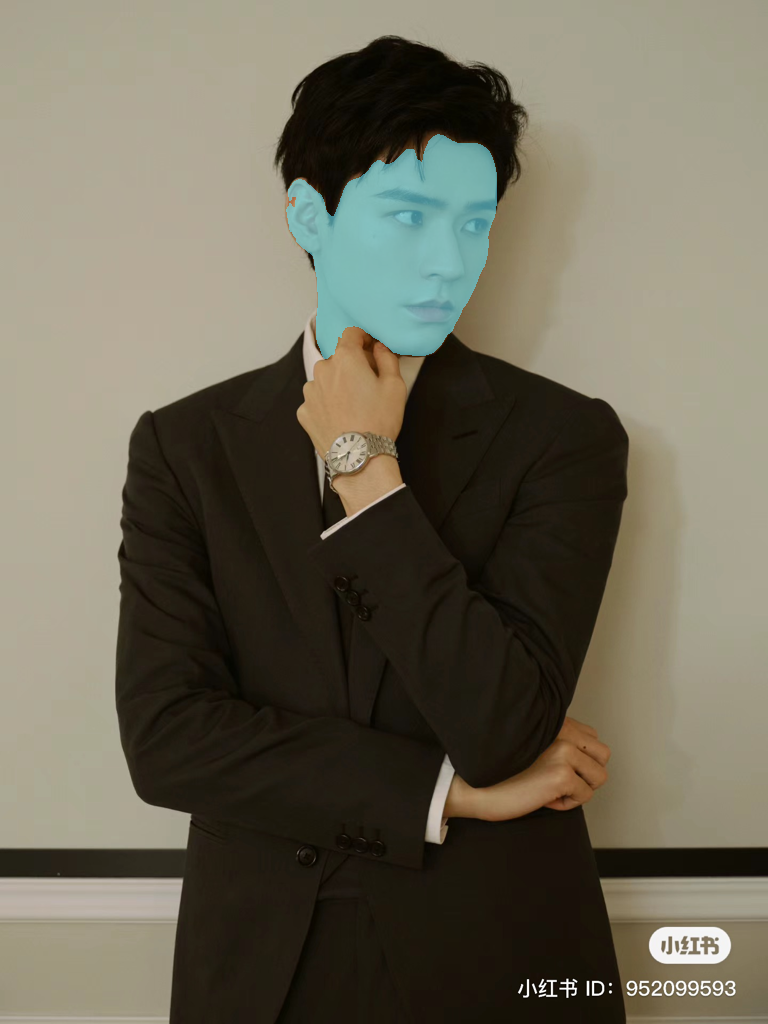

In [126]:
show_masks_on_image(
    resize_image,
    masks=mask
)